Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
# Choose your target. Which column in your tabular dataset will you predict?:
#       -(COLUMN I CREATE CALLED 'HIGHCOST' which will have 2 different available entries: yes or no)
# Is your problem regression or classification?:
#       -CLASSIFICATION [HighCost])
# How is your target distributed?
# Classification: How many classes? Are the classes imbalanced?:
#       -(TWO; no) cutoff point between low and high cost is $1.41
# Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy 
# if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, 
# in addition to or instead of accuracy?:
#       -
# Choose which observations you will use to train, validate, and test your model:
#       -(AVERAGEPRICE, TOTALVOLUME, TOTALBAGS, TYPE & REGION)
# Are some observations outliers? Will you exclude them?:
#       -THERE ARE OUTLIERS/WILL INCLUDE THEM
# Will you do a random split or a time-based split? 
#       -RANDOM SPLIT
# Begin to clean and explore your data.
# Begin to choose which features, if any, to exclude. Would some features "leak" future information? 
#       -(WILL PROBABLY EXCLUDE THE 'PLU' COLUMNS & SIZE OF BAGS COLUMNS)

In [1]:
import pandas as pd

In [2]:
# Importing dataset about the average price per avocado:
df = pd.read_csv('avocado.csv')

In [3]:
# Examining df:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Getting a sample of the data:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13579,34,2016-05-01,1.60,5699.71,2123.26,145.20,0.00,3431.25,3431.25,0.00,0.00,organic,2016,Orlando
13786,33,2016-05-08,1.58,54825.59,5399.74,23826.50,11269.89,14329.46,8338.82,5990.64,0.00,organic,2016,Plains
3956,4,2016-11-27,1.01,2257271.18,865743.41,416437.85,50949.95,924139.97,868269.44,34138.07,21732.46,conventional,2016,LosAngeles
7856,14,2017-09-24,1.76,653751.09,118405.01,461050.64,2948.47,71346.97,70570.56,463.21,313.20,conventional,2017,SanFrancisco
8963,5,2018-02-18,1.19,530247.15,131656.46,330556.13,700.57,67333.99,57058.58,3145.98,7129.43,conventional,2018,Sacramento


In [5]:
# Looking at df's shape:
df.shape

(18249, 14)

In [6]:
# Check for NaN/null values:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

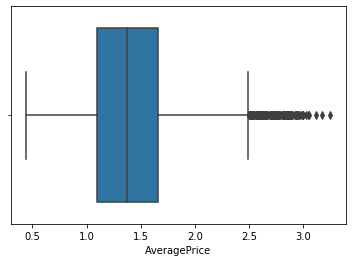

In [7]:
# Looking for outliers:
import seaborn as sns
sns.boxplot(x=df['AveragePrice']);

In [8]:
# Checking spread of values to determine how to
# Make my target column
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [9]:
# Making target column called 'HighCost',
# Then looking at sample of data:
import numpy as np
df['HighCost'] = np.where(df['AveragePrice'] >= 1.41, 'yes', 'no')
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,HighCost
9070,4,2018-02-25,1.24,68888.16,7676.62,31987.77,94.31,29129.46,20766.25,8363.21,0.00,conventional,2018,Syracuse,no
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.00,organic,2015,PhoenixTucson,no
1897,25,2015-07-05,1.19,574999.04,215805.97,273227.27,22969.60,62996.20,59731.74,3256.13,8.33,conventional,2015,Portland,no
13626,29,2016-06-05,1.91,9901.74,401.54,3388.66,12.55,6098.99,5183.48,915.51,0.00,organic,2016,Philadelphia,yes
12700,39,2016-03-27,1.53,1816.88,73.89,1274.17,0.00,468.82,453.33,15.49,0.00,organic,2016,GrandRapids,yes


In [10]:
# Renaming column Unnamed:0 to 'PurchaseInstance':
df = df.rename({'Unnamed: 0': 'PurchaseInstance'}, axis=1)
df.sample(5)

,PurchaseInstance,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,HighCost
16247,22,2017-07-30,1.88,71035.90,3407.72,17677.84,285.56,49664.78,49656.41,8.37,0.00,organic,2017,NewYork,yes
10256,38,2015-04-05,1.67,9356.12,4828.61,3641.12,0.00,886.39,545.40,340.99,0.00,organic,2015,LasVegas,yes
17955,6,2018-02-11,1.69,233976.66,10690.15,28304.93,798.88,194182.70,175554.11,18628.59,0.00,organic,2018,Northeast,yes
6136,43,2017-03-05,0.78,272988.49,2739.88,82627.36,1107.95,186513.30,20142.93,166331.26,39.11,conventional,2017,CincinnatiDayton,no
10530,0,2015-12-27,1.55,2215.74,383.17,5.85,0.00,1826.72,1826.72,0.00,0.00,organic,2015,NewOrleansMobile,yes


In [11]:
# Dropping columns for PLU, and bag size:
df = df.drop(columns=['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'])
df.head()

,PurchaseInstance,Date,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost
0,0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,no
1,1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,no
2,2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,no
3,3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,no
4,4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,no


In [12]:
# Converting 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,PurchaseInstance,Date,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost
0,0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,no
1,1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,no
2,2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,no
3,3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,no
4,4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,no


In [13]:
# Extracting 'Month' from 'Date', (since time of year may be a determining
# factor when predicting price) then dropping 'Date':
df['MonthRecorded'] = df['Date'].dt.month
df = df.drop(columns='Date')
df.head()

,PurchaseInstance,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost,MonthRecorded
0,0,1.33,64236.62,8696.87,conventional,2015,Albany,no,12
1,1,1.35,54876.98,9505.56,conventional,2015,Albany,no,12
2,2,0.93,118220.22,8145.35,conventional,2015,Albany,no,12
3,3,1.08,78992.15,5811.16,conventional,2015,Albany,no,12
4,4,1.28,51039.60,6183.95,conventional,2015,Albany,no,11


In [14]:
# Removing column called PurchaseInstance, as I don't think it's needed:
df = df.drop(columns='PurchaseInstance')
df.head()

,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost,MonthRecorded
0,1.33,64236.62,8696.87,conventional,2015,Albany,no,12
1,1.35,54876.98,9505.56,conventional,2015,Albany,no,12
2,0.93,118220.22,8145.35,conventional,2015,Albany,no,12
3,1.08,78992.15,5811.16,conventional,2015,Albany,no,12
4,1.28,51039.60,6183.95,conventional,2015,Albany,no,11


In [15]:
# Determining the majority class:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train.shape, test.shape

((13686, 8), (4563, 8))

In [16]:
target = 'HighCost'
y_train = train[target]
y_train.value_counts(normalize=True)

no     0.532588
yes    0.467412
Name: HighCost, dtype: float64

In [17]:
# Majority Class for every prediction:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [18]:
# Getting accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.5325880461785767

In [ ]:
# Assignment for Sunday, April 26th 2020:
# Continue to clean and explore your data.
# For the evaluation metric you chose, what score would you get just by guessing?
# Can you make a fast, first model that beats guessing?

In [19]:
# Removing the dependant variable/target from test:
test = test.drop(columns='HighCost')
train.shape, test.shape

((13686, 8), (4563, 7))

In [20]:
# Splitting into train, val & test:
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                             stratify=train['HighCost'], random_state=42)
train.shape, val.shape, test.shape

((10948, 8), (2738, 8), (4563, 7))

In [21]:
target = 'HighCost'
y_train = train[target]
y_train.value_counts(normalize=True)

no     0.532609
yes    0.467391
Name: HighCost, dtype: float64

In [22]:
# Majority Class for every prediction a 2nd time:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [23]:
# Accuracy score a 2nd time:
accuracy_score(y_train, y_pred_train)

0.532608695652174

In [24]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.5325054784514244